# Analyzing data in Python through visual representation and additional investigation

In this notebook, our objective is to comprehend the performance of a solar power plant by analyzing the data produced by its photovoltaic modules.

Notebook is consist of:
1. **Review of photovoltaic systems (PV systems)**
2. **Exploratory Data Analysis (EDA):**
3. **Examination of the correlation among all features**


## Photovoltic systems

<center>
<img src="https://www.ti-soft.com/img/electricaldesign/photovoltaics-how-it-works.jpg" width="450"><br/>
</center>


A **PV System** is designed to harness solar power through photovoltaics, utilizing **PV Cells** that directly convert light energy into electricity. These cells, governed by the **Photovoltaic Effect**, serve as the foundational units for **PV Modules**, encapsulated groups of cells connected in series and/or parallel. The aggregation of modules forms a **PV Panel**, and multiple panels constitute a complete **PV Array**.

### PV inverter

The **PV Inverter** is integral, converting DC power from batteries or PV arrays into AC power for standard utility-powered appliances. It acts as the core of PV systems, facilitating the transformation from DC to AC power.

PV systems are influenced by weather conditions, with optimal yield in good weather and reduced yield in adverse conditions. Understanding the weather's impact on the yield of solar power plants is crucial.


According to the notion of PV systems, the key feature that been investigated are:

- *DC power*

- *AC power*

- *Yield*

- *ambiant Temperature*

- *module temperature*

- *irradiation*


# Setting-up the enviroment

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
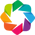

In [2]:
#import all package needed
import matplotlib.pyplot as plt  #for plotting
import seaborn as sns    #tatistical data visualization
import statsmodels.api as sm  #estimating and testing statistical models
from scipy.stats import normaltest #distribution
import holoviews as hv  # interactive visualizations
from holoviews import opts  #customization for Holoviews plots
import cufflinks as cf #Pandas DataFrames
hv.extension('bokeh') #Holoviews Extension

### Here,configure appearance of the plots.

In [3]:
cf.set_config_file(offline = True)
sns.set(style="whitegrid")

# Introducing Plant data.

Plant contains 22 inverters where each inverter are connected with several PV array. Every 15 min, each inverter records his data. So, if we want to know how many the plant has produced a power in a hour, we just compute the contribution of 22 inverters. 

In [4]:
#we take file for plant 1 Generation data
file = '/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv'

In [5]:
plant1_data = pd.read_csv(file) # load data

In [6]:
plant1_data.tail()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0

In [7]:
print('The number of inverter for data_time {} is {}'.format('15-05-2020 23:00', plant1_data[plant1_data.DATE_TIME == '15-05-2020 23:00']['SOURCE_KEY'].nunique()))

The number of inverter for data_time 15-05-2020 23:00 is 22


In [8]:
plant1_data.info() # we check if there exist missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [9]:
#we compute a sum of 22 inverters
plant1_data = plant1_data.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum')

In [10]:
plant1_data = plant1_data.reset_index()

In [11]:
plant1_data.head()

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
0  01-06-2020 00:00       0.0       0.0      5407.25  153519480.0
1  01-06-2020 00:15       0.0       0.0         0.00  153519480.0
2  01-06-2020 00:30       0.0       0.0         0.00  153519480.0
3  01-06-2020 00:45       0.0       0.0         0.00  153519480.0
4  01-06-2020 01:00       0.0       0.0         0.00  153519480.0

**``Rearranging data file``**

I convert ``DATE_TIME`` object type to datetime type. After I separate ``DATE_TIME`` to **date** and **time**

In [12]:
plant1_data['DATE_TIME'] = pd.to_datetime(plant1_data['DATE_TIME'], errors='coerce')

In [13]:
plant1_data['time'] = plant1_data['DATE_TIME'].dt.time
plant1_data['date'] = pd.to_datetime(plant1_data['DATE_TIME'].dt.date)

In [14]:
plant1_data.shape # our data reduced very well

(3158, 7)

In [15]:
#we check
plant1_data.head()

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD      time  \
0 2020-01-06 00:00:00       0.0       0.0      5407.25  153519480.0  00:00:00   
1 2020-01-06 00:15:00       0.0       0.0         0.00  153519480.0  00:15:00   
2 2020-01-06 00:30:00       0.0       0.0         0.00  153519480.0  00:30:00   
3 2020-01-06 00:45:00       0.0       0.0         0.00  153519480.0  00:45:00   
4 2020-01-06 01:00:00       0.0       0.0         0.00  153519480.0  01:00:00   

        date  
0 2020-01-06  
1 2020-01-06  
2 2020-01-06  
3 2020-01-06  
4 2020-01-06

In [16]:
plant1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3158 non-null   datetime64[ns]
 1   DC_POWER     3158 non-null   float64       
 2   AC_POWER     3158 non-null   float64       
 3   DAILY_YIELD  3158 non-null   float64       
 4   TOTAL_YIELD  3158 non-null   float64       
 5   time         3158 non-null   object        
 6   date         3158 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 172.8+ KB


## Plant Data Exploration

### Now we starting exploring data using below features:.


**Line or scatter plot**//  plt.plot(x_data, y_data)/plt.scatter(x_data, y_data)

**change rate**//  change_rate = df['column_name'].pct_change()

**Box and Whisker plot**//  sns.boxplot(x='column_name', data=df)

**calendar plot**//  cal_plot = CalendarHeatmap

**Bar chart**//  df['column_name'].value_counts().plot(kind='bar')

## **DC Power**

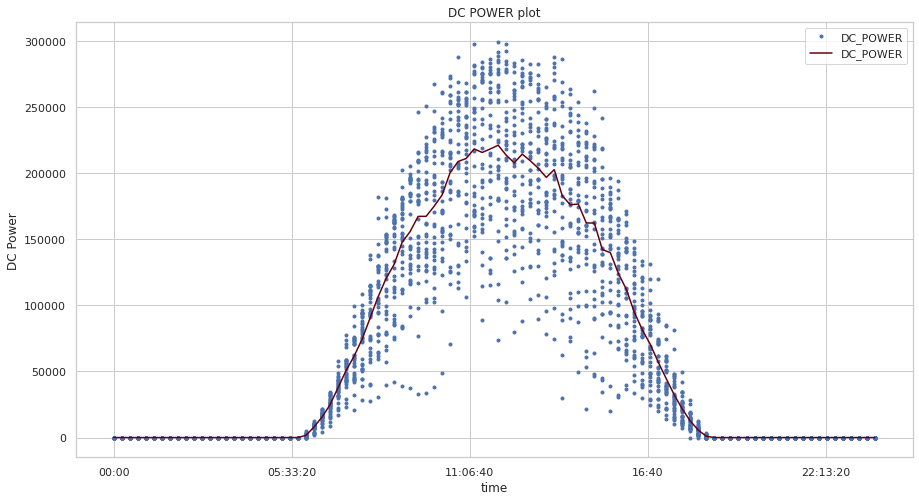

In [17]:
#plant1_data.iplot(x= 'time', y='DC_POWER', xTitle='Time',  yTitle= 'DC Power', title='DC POWER plot')
plant1_data.plot(x= 'time', y='DC_POWER', style='.', figsize = (15, 8))
plant1_data.groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

Between 05:33:20 and 18:00:00, the Plant produces a dc power but otherwise there is null. The reason is sunlight. 

In [18]:
#Okay, we are going to see dc power in each day produced by Plant.
#we create calendar_dc data how in each day Plant produce a dc power in each time.

calendar_dc = plant1_data.pivot_table(values='DC_POWER', index='time', columns='date')

In [19]:
calendar_dc.tail()

date      2020-01-06  2020-02-06  2020-03-06  2020-04-06  2020-05-06  \
time                                                                   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         0.0         0.0         0.0         0.0         0.0   
23:30:00         0.0         0.0         0.0         0.0         0.0   
23:45:00         0.0         0.0         0.0         0.0         0.0   

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  ...  \
time                                                                  ...   
22:45:00         0.0         0.0         0.0         0.0         0.0  ...   
23:00:00         0.0         0.0         0.0         0.0         0.0  ...   
23:15:00         NaN         0.0         0.0         0.0         0.0  ...   
23:30:00         NaN         0.0         0.0         0.0         0.0  ...   
23:45:00         NaN         0.0         0.0         0.0         0.0  ...   

date      2020-06-14  2020-06-15  2020-06-16  2020-06-17  2020-07-06  \
time                                                                   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         0.0         0.0         0.0         0.0         0.0   
23:30:00         0.0         0.0         0.0         0.0         0.0   
23:45:00         0.0         0.0         0.0         0.0         0.0   

date      2020-08-06  2020-09-06  2020-10-06  2020-11-06  2020-12-06  
time                                                                  
22:45:00         0.0         0.0         0.0         0.0         0.0  
23:00:00         0.0         0.0         0.0         0.0         0.0  
23:15:00         0.0         0.0         0.0         0.0         0.0  
23:30:00         0.0         0.0         0.0         0.0         0.0  
23:45:00         0.0         0.0         0.0         0.0         0.0  

[5 rows x 34 columns]

In [20]:
# define function to multi plot

def multi_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,20)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.8)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, style = 'k.')
        ax.set_title('{} {}'.format(title, cols[i-1]))

Here we using "Multi-Plot Visualization of Calendar Data" with 9 Rows and 4 Columns

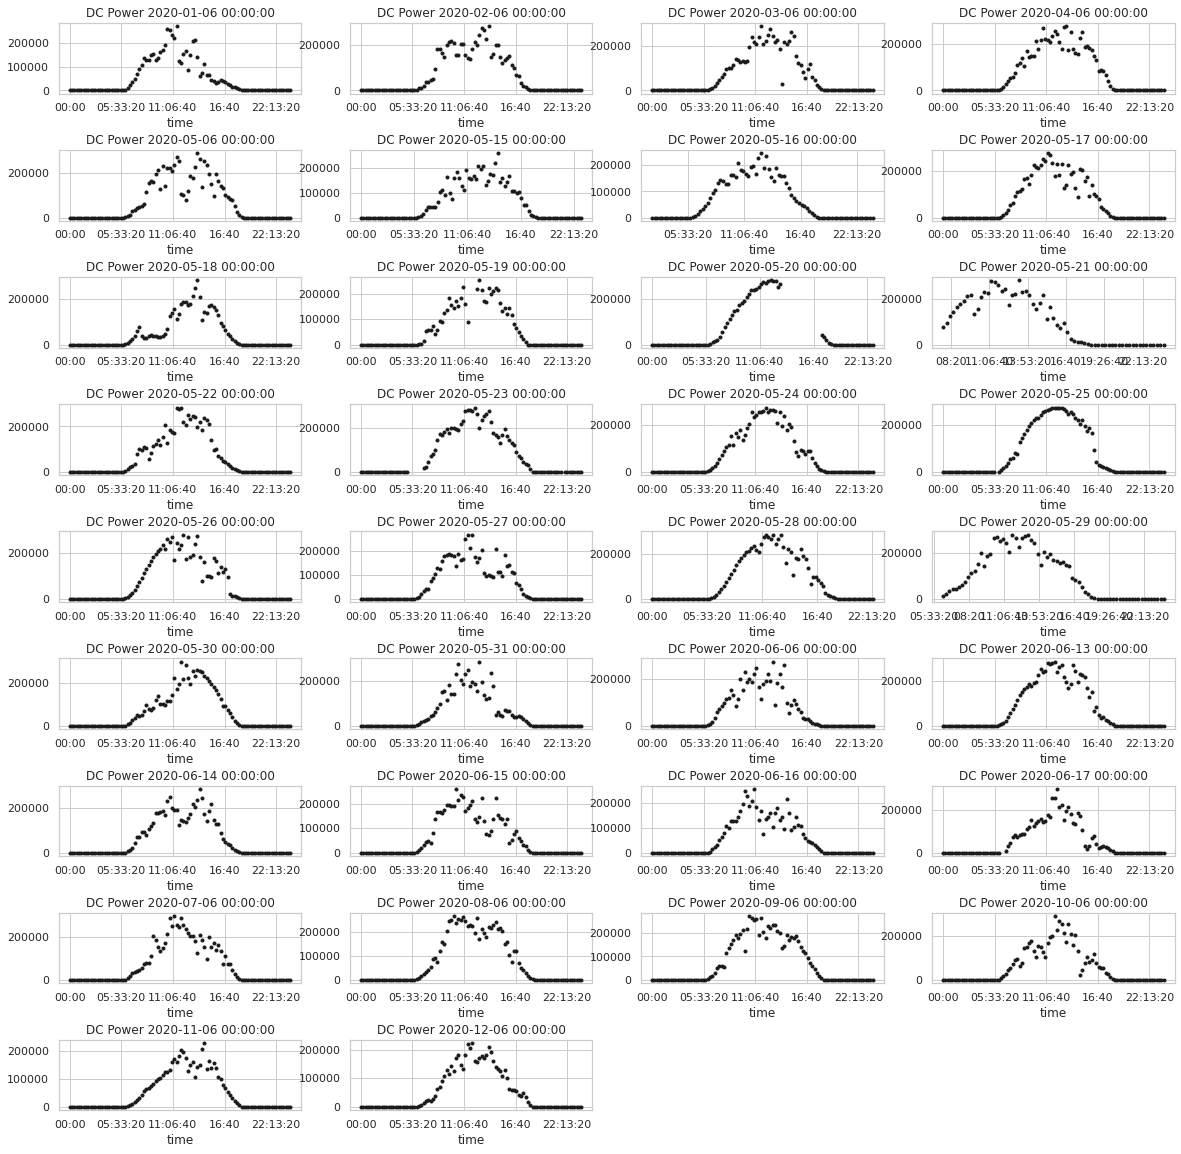

In [21]:
multi_plot(data=calendar_dc, row=9, col=4)

 **Observation**: Almost all the curves are the same despite some fluctuation between 11 am and 2 pm. except the curve of May 20 and 25 which gives a uniform shape.

In [22]:
daily_dc = plant1_data.groupby('date')['DC_POWER'].agg('sum')

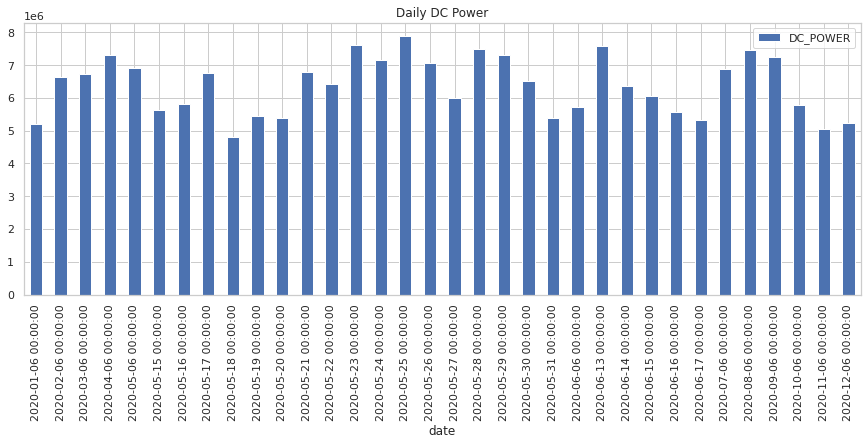

In [23]:
daily_dc.plot.bar(figsize=(15,5), legend=True)
plt.title('Daily DC Power')
plt.show()

**Observation**: Only **``2020-05-25``** dc power is maximun.

## **Daily Yield** 
"Daily Yield" would represent the amount of energy or electricity generated by the solar panels in a given day. It is a key metric in assessing the performance of solar power installations, providing insights into the efficiency and productivity of the system on a daily basis.

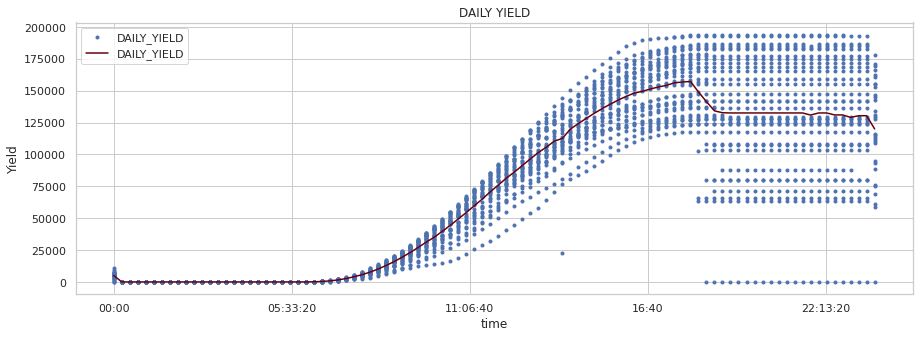

In [24]:
plant1_data.plot(x='time', y='DAILY_YIELD', style='b.', figsize=(15,5))
plant1_data.groupby('time')['DAILY_YIELD'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('DAILY YIELD')
plt.ylabel('Yield')
plt.show()

**Observation**: data gives us a logistics-like function but after ``18:00`` the energy decrease slowly; suddenly at ``00:00`` breakdown.

In [25]:
#pivot table data
daily_yield = plant1_data.pivot_table(values='DAILY_YIELD', index='time', columns='date')

Same as power we usuing multiploting for Daily yield

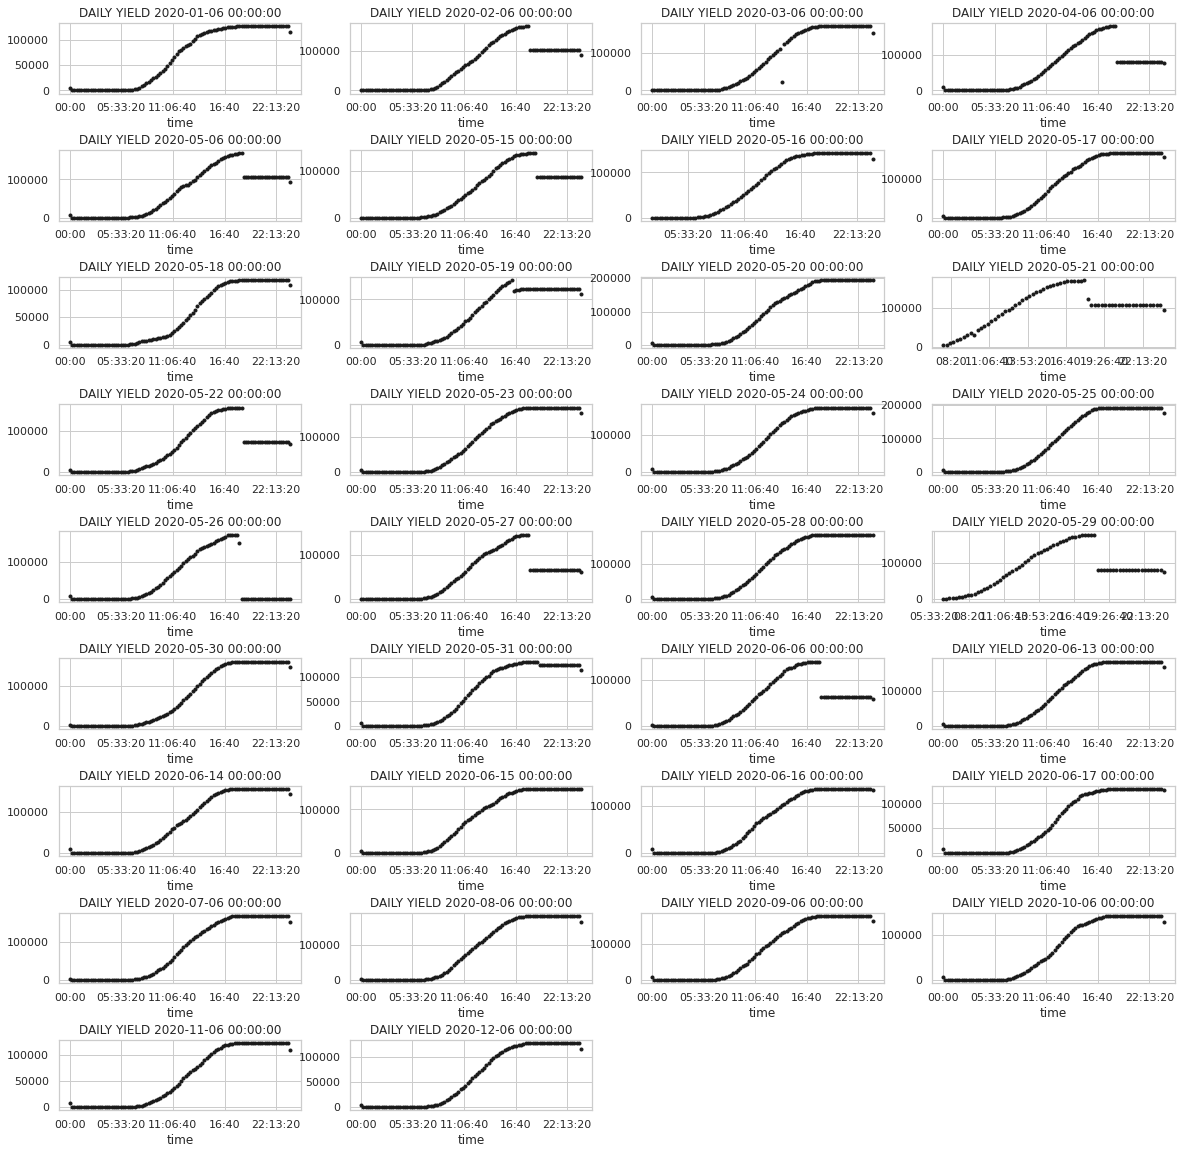

In [26]:
# we plot all daily yield
multi_plot(data=daily_yield.interpolate(), row=9, col=4, title='DAILY YIELD')

**Observation**: As we can see some daily_yield date (``2020-02-06``, ``2020-05-19``,...) have a logistic shape  with missing values but others have not.
Every 15 min data is recorded. After 15 min, we get a **new yield**. To compute this new yield it is just this formula:

``new yield = next yield - previous yield``. It is a difference equation that ``.diff()`` pandas function can help us to compute it.

#plotting a change rate daily yield over time
multi_plot(data=daily_yield.diff()[daily_yield.diff()>0], row=9, col=4, title='new yield')

Between ``08:20`` and ``16:40``, we obtain each 15min, **$new yield > 2500$** with fluctuation.

**Daily Yield each day**
For better analysis, we are using **Boxplot** 

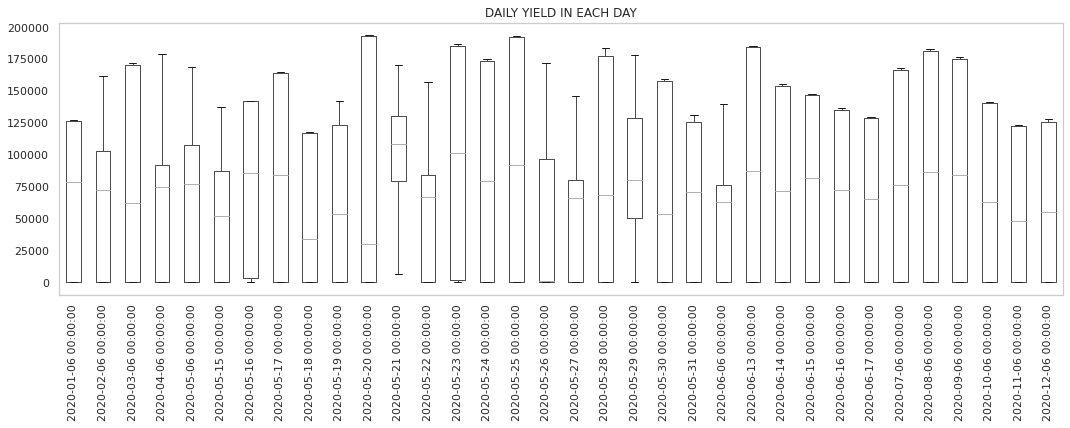

In [27]:
daily_yield.boxplot(figsize=(18,5), rot=90, grid=False)
plt.title('DAILY YIELD IN EACH DAY')
plt.show()

For each day, the daily yield change. some day is high. The observation of all boxes is good, outlier does not exist. 


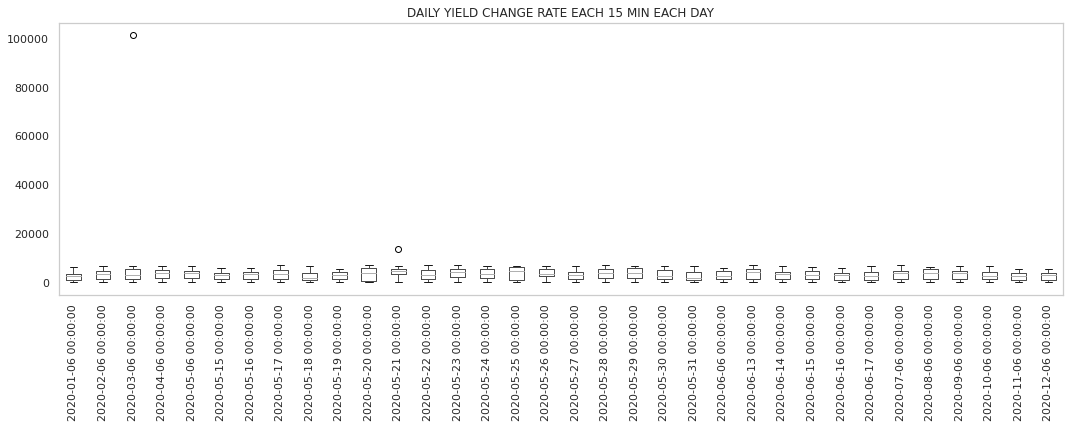

In [28]:
daily_yield.diff()[daily_yield.diff()>0].boxplot(figsize=(18,5), rot=90, grid=False)
plt.title('DAILY YIELD CHANGE RATE EACH 15 MIN EACH DAY')
plt.show()

Only two days have an outlier **2020-03-06** and **2020-05-21**. 

In [29]:
#we compute a daily yield for each date.
dyield = plant1_data.groupby('date')['DAILY_YIELD'].agg('sum')

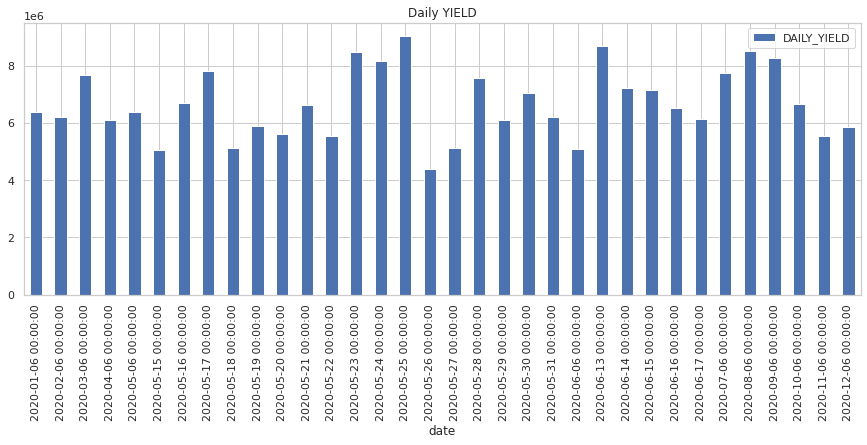

In [30]:
dyield.plot.bar(figsize=(15,5), legend=True)
plt.title('Daily YIELD')
plt.show()

# Introducing Weather Sensor Data
In our solar plant analysis, we utilize vital weather sensor data for insights. **Ambient temperature** signifies general atmospheric conditions, impacting photovoltaic system efficiency. **Module temperature** reflects the heat experienced by solar panels, influencing energy generation. **Irradiation measures** solar radiation, crucial for evaluating sunlight exposure intensity. By examining these metrics, we seek patterns to optimize daily yield, enhancing efficiency and understanding system behavior under diverse weather conditions.

In [31]:
file1 = '/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv'

In [32]:
plant1_sensor = pd.read_csv(file1)

In [33]:
plant1_sensor.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [34]:
plant1_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [35]:
plant1_sensor['DATE_TIME'] = pd.to_datetime(plant1_sensor['DATE_TIME'], errors='coerce')

In [36]:
# same work cleaning data
plant1_sensor['date'] = pd.to_datetime(pd.to_datetime(plant1_sensor['DATE_TIME']).dt.date)
plant1_sensor['time'] = pd.to_datetime(plant1_sensor['DATE_TIME']).dt.time


del plant1_sensor['PLANT_ID']
del plant1_sensor['SOURCE_KEY']

In [37]:
plant1_sensor.tail()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
3177 2020-06-17 22:45:00            22.150570           21.480377   
3178 2020-06-17 23:00:00            22.129816           21.389024   
3179 2020-06-17 23:15:00            22.008275           20.709211   
3180 2020-06-17 23:30:00            21.969495           20.734963   
3181 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION       date      time  
3177          0.0 2020-06-17  22:45:00  
3178          0.0 2020-06-17  23:00:00  
3179          0.0 2020-06-17  23:15:00  
3180          0.0 2020-06-17  23:30:00  
3181          0.0 2020-06-17  23:45:00

### Ambient Temperature

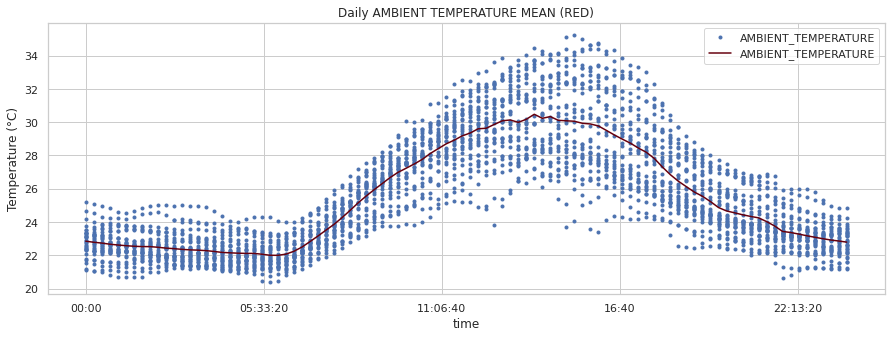

In [38]:
plant1_sensor.plot(x='time', y = 'AMBIENT_TEMPERATURE' , style='b.', figsize=(15,5))
plant1_sensor.groupby('time')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily AMBIENT TEMPERATURE MEAN (RED)')
plt.ylabel('Temperature (°C)')
plt.show()

In [39]:
ambient = plant1_sensor.pivot_table(values='AMBIENT_TEMPERATURE', index='time', columns='date')

In [40]:
ambient.tail()

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  \
time                                                                   
22:45:00   22.057080   24.492981   21.315892   22.815780   23.393146   
23:00:00   22.236018   24.461625   21.220532   22.787469   23.230817   
23:15:00         NaN   24.392568   21.216575   22.856671   22.916650   
23:30:00         NaN   24.378021   21.273112   22.750576   22.787917   
23:45:00         NaN   24.249347   21.209418   22.621004   22.638493   

date      2020-05-20  2020-05-21  2020-05-22  2020-05-23  2020-05-24  ...  \
time                                                                  ...   
22:45:00   24.003129   24.002574   23.214526   25.338855   24.403691  ...   
23:00:00   23.830852   23.978326   22.361055   25.133763   24.308990  ...   
23:15:00   23.701162   23.922381   21.641128   24.969698   24.175543  ...   
23:30:00   23.589626   23.892236   21.564903   24.838093   24.169597  ...   
23:45:00   23.569009   23.856805   21.605520   24.818829   23.777932  ...   

date      2020-06-08  2020-06-09  2020-06-10  2020-06-11  2020-06-12  \
time                                                                   
22:45:00   23.170805   22.946915   22.014016   23.419015   22.599839   
23:00:00   23.115568   22.883195   22.087756   23.328575   22.504606   
23:15:00   22.929185   22.892314   22.247858   23.195113   22.398564   
23:30:00   22.616367   22.866815   22.409064   23.027635   22.145038   
23:45:00   22.369204   22.825907   22.643738   22.883351   21.820540   

date      2020-06-13  2020-06-14  2020-06-15  2020-06-16  2020-06-17  
time                                                                  
22:45:00   22.265993   23.522461   23.612832   22.872359   22.150570  
23:00:00   22.227169   23.386562   23.618848   22.962205   22.129816  
23:15:00   22.334206   23.331081   23.602976   22.947974   22.008275  
23:30:00   22.237394   23.444953   23.631051   22.925033   21.969495  
23:45:00   22.205029   23.418154   23.641211   22.892004   21.909288  

[5 rows x 34 columns]

Text(0, 0.5, 'Temperature (°C)')

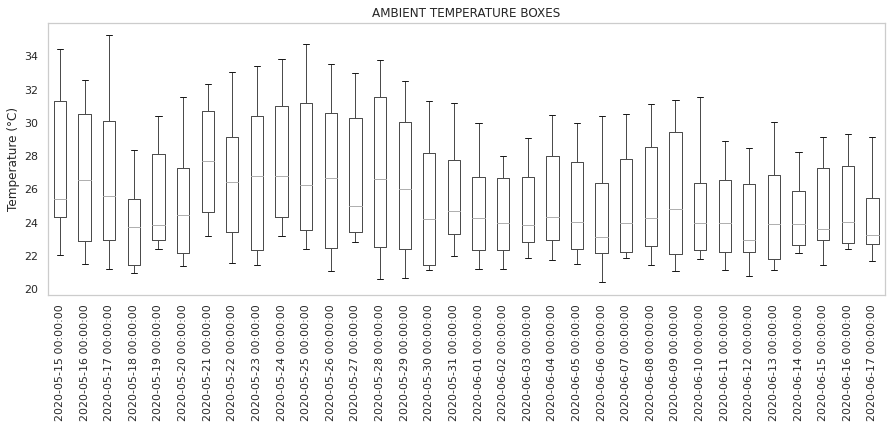

In [41]:
ambient.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('AMBIENT TEMPERATURE BOXES')
plt.ylabel('Temperature (°C)')

In [42]:
am_temp = plant1_sensor.groupby('date')['AMBIENT_TEMPERATURE'].agg('mean')

Text(0, 0.5, 'Temperature (°C)')

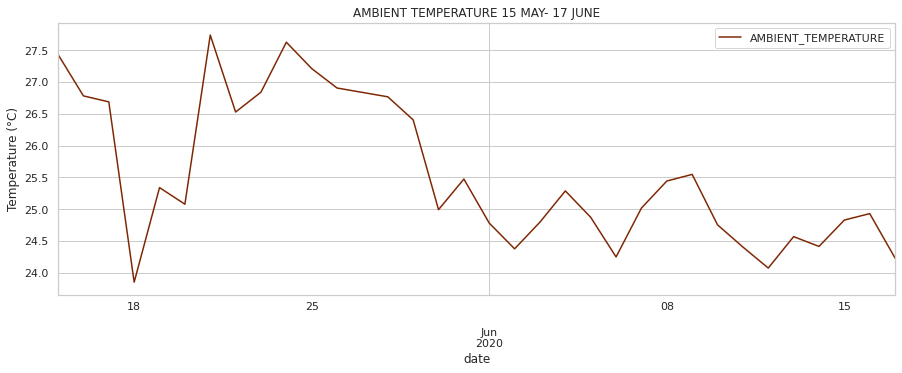

In [43]:
am_temp.plot(grid=True, figsize=(15,5), legend=True, colormap='Oranges_r')
plt.title('AMBIENT TEMPERATURE 15 MAY- 17 JUNE')
plt.ylabel('Temperature (°C)')

**Observation**:

In May, ambiant Temperature in Plant was between 24 and 30°C, this means that May was very hot. But in June ambiant Temperature decreases considerately between 24 and 26°C.

In the next cell, we will seek how % change of ambient Temperature is.

In [44]:
am_change_temp = (am_temp.diff()/am_temp)*100

Text(0.5, 1.0, 'AMBIENT TEMPERATURE %change')

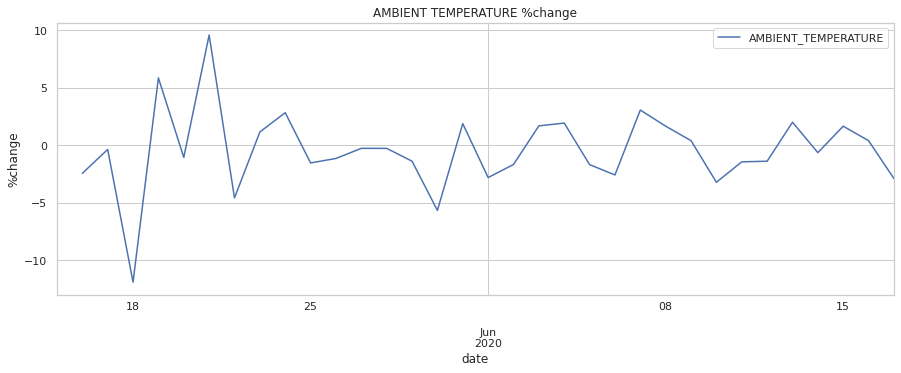

In [45]:
am_change_temp.plot(figsize=(15,5), grid=True, legend=True)
plt.ylabel('%change')
plt.title('AMBIENT TEMPERATURE %change')

**Observation**:

1. Sunday 17 May 2020 to Monday 18 May 2020, the ambient Temperature decreases to 10%.

2. Monday 18 May 2020 to Tuesday 19 May 2020, the ambient Temperature increases to 15% and tomorrow decreases to 5%.

3. Wednesday 20 May 2020 to Thursday 21 May 2020, the ambient Temperature increases to 10% and tomorrow decreases to 15%.

4. June month's, the ambiant Temperature %change stabilize between -2.5 and 2.5%. 

## Ambient Temperature: Seasonal, Trend and Residual.
1. **Seasonal Component**: Recurring patterns or variations in ambient temperature that follow a specific seasonality. For instance, temperatures may exhibit regular fluctuations based on the seasons, such as warmer temperatures in summer and cooler temperatures in winter.

2. **Trend Component**: The trend represents the long-term direction or tendency in the ambient temperature data. It captures the overall movement, indicating whether temperatures are generally increasing, decreasing, or remaining relatively stable over an extended period.

3. **Residual Component**: Also known as the remainder or error term, the residual component accounts for any variability in the ambient temperature data that cannot be explained by the seasonal and trend components. It encompasses random fluctuations, noise, or unanticipated factors influencing temperature.

In [46]:
from scipy.signal import periodogram

In [47]:
decomp = sm.tsa.seasonal_decompose(am_temp)

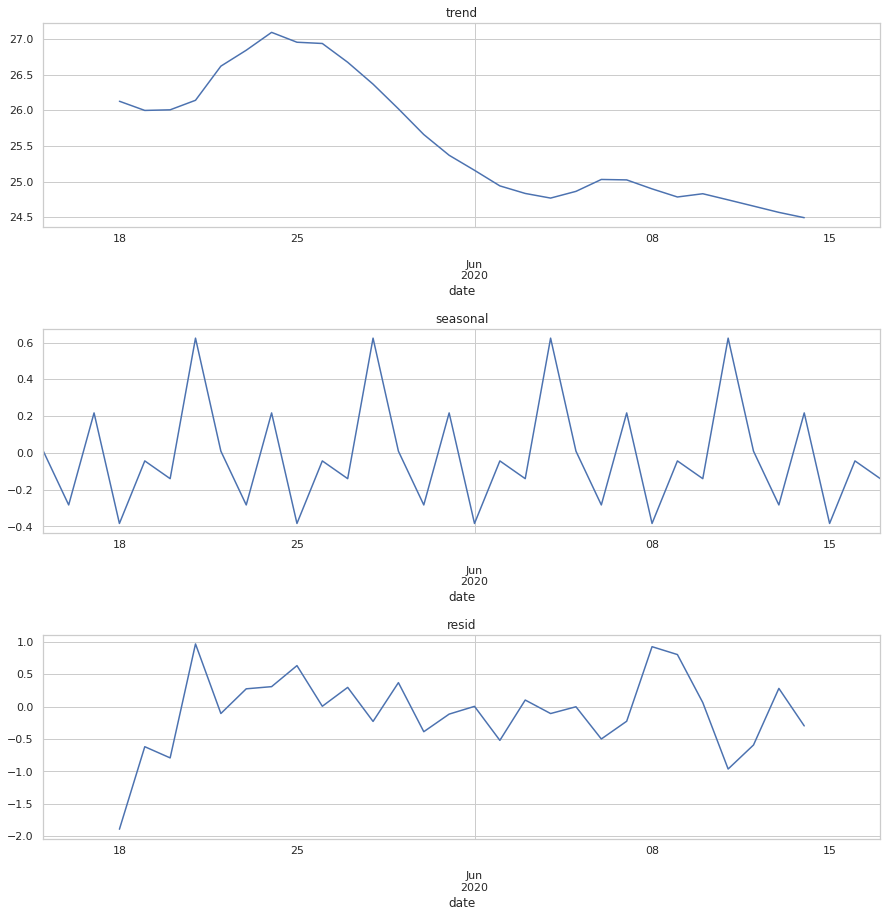

In [48]:
cols = ['trend', 'seasonal', 'resid'] # take all column
data = [decomp.trend, decomp.seasonal, decomp.resid]
gp = plt.figure(figsize=(15,15)) 
    
gp.subplots_adjust(hspace=0.5)
for i in range(1, len(cols)+1):
    ax = gp.add_subplot(3,1, i)
    data[i-1].plot(ax=ax)
    ax.set_title('{}'.format(cols[i-1]))

**Observation**

seasonality of ambient Temperature is the **7 days** to see a maximun of temperature.  

### Module Temperature

Text(0, 0.5, 'Temperature(°C)')

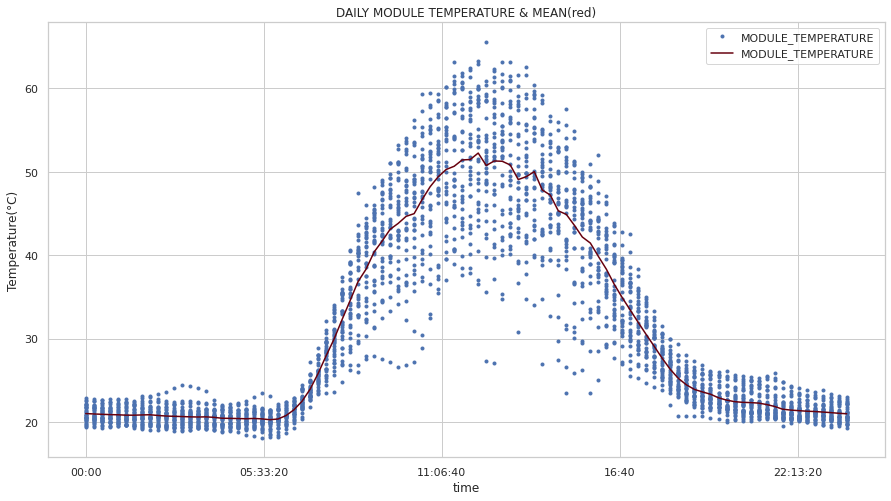

In [49]:
plant1_sensor.plot(x='time', y='MODULE_TEMPERATURE', figsize=(15,8), style='b.')
plant1_sensor.groupby('time')['MODULE_TEMPERATURE'].agg('mean').plot(colormap='Reds_r', legend=True)
plt.title('DAILY MODULE TEMPERATURE & MEAN(red)')
plt.ylabel('Temperature(°C)')

In [50]:
module_temp = plant1_sensor.pivot_table(values='MODULE_TEMPERATURE', index='time', columns='date')

Text(0, 0.5, 'Temperature (°C)')

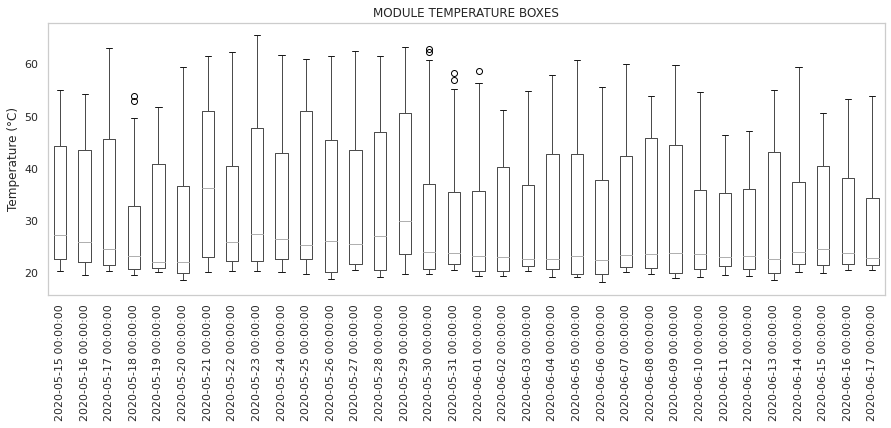

In [51]:
module_temp.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('MODULE TEMPERATURE BOXES')
plt.ylabel('Temperature (°C)')

**Observation**

Four dates contains outliers: **18-05-2020, 30-05-2020, 31-05-2020, 01-06-2020**. The outlier of these 3 dates occurs precisely at interval time $[11:06:40, 16:40]$. see

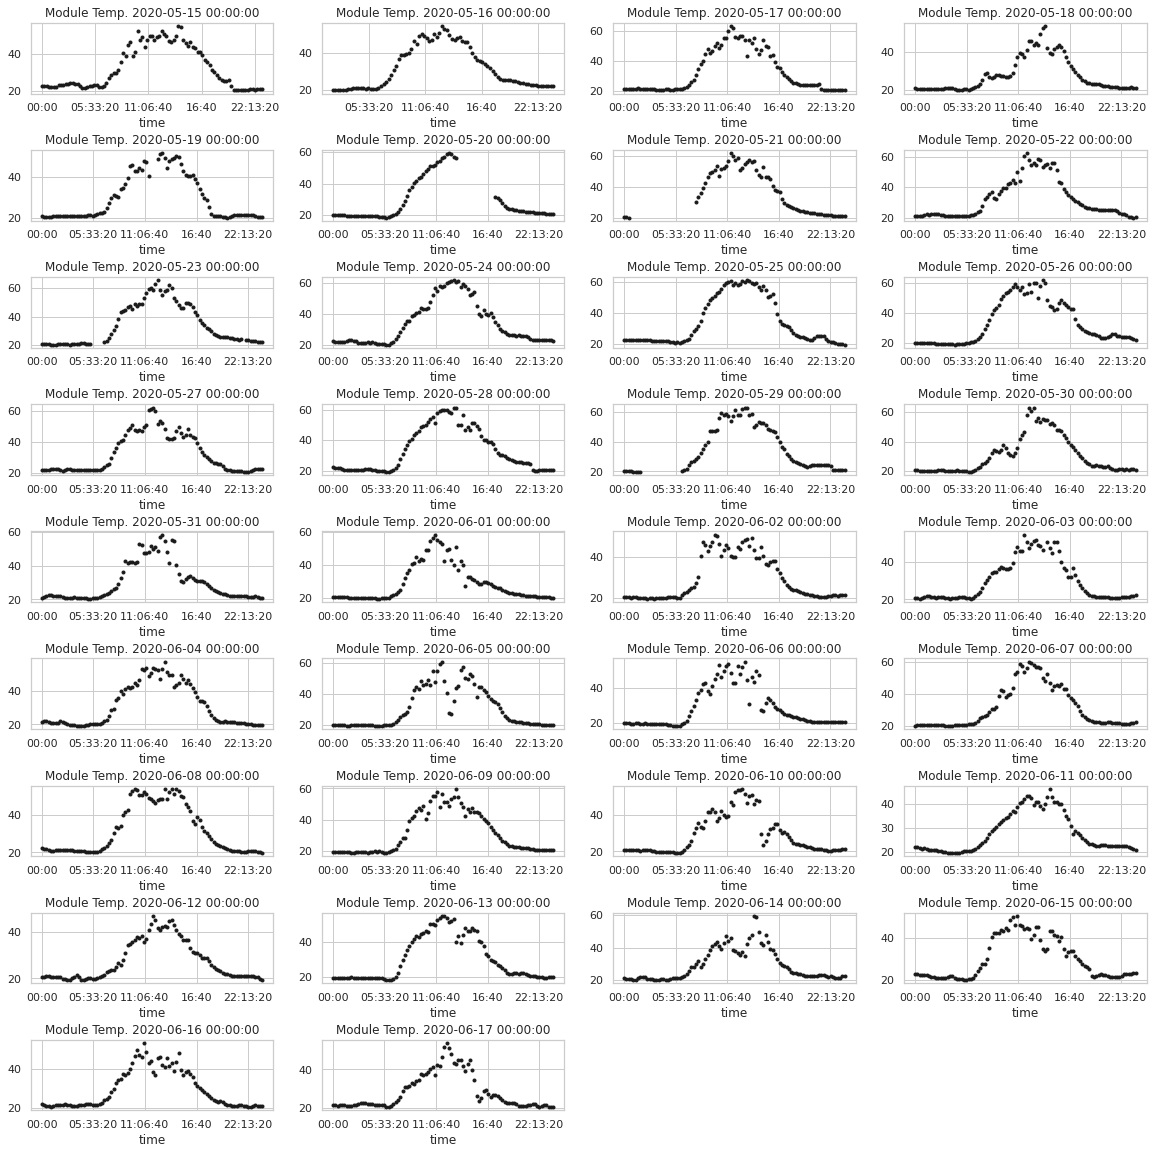

In [52]:
multi_plot(module_temp, row=9,  col=4, title='Module Temp.')

In [53]:
#we can also see also calendar plot
mod_temp = plant1_sensor.groupby('date')['MODULE_TEMPERATURE'].agg('mean')

Text(0, 0.5, 'Temperature (°C)')

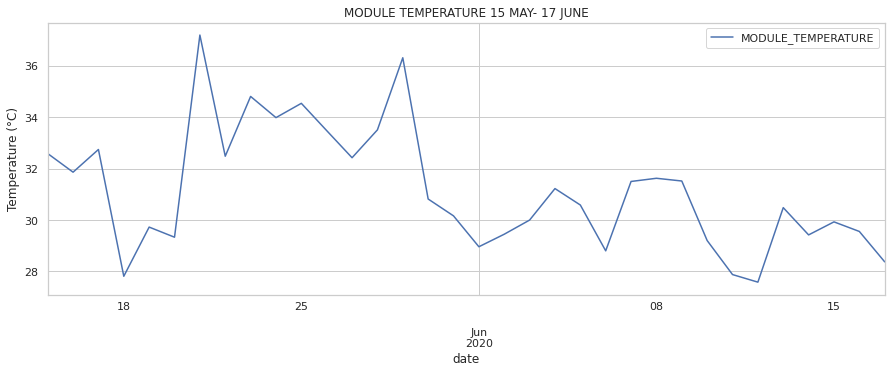

In [54]:
mod_temp.plot(grid=True, figsize=(15,5), legend=True)
plt.title('MODULE TEMPERATURE 15 MAY- 17 JUNE')
plt.ylabel('Temperature (°C)')

**Observation**

May month's have: 2 huges hot date 21 and 29. 

In [55]:
#we plot a %change of MODULE TEMPERATURE.
chan_mod_temp = (mod_temp.diff()/mod_temp)*100

Text(0.5, 1.0, 'MODULE TEMPERATURE %change')

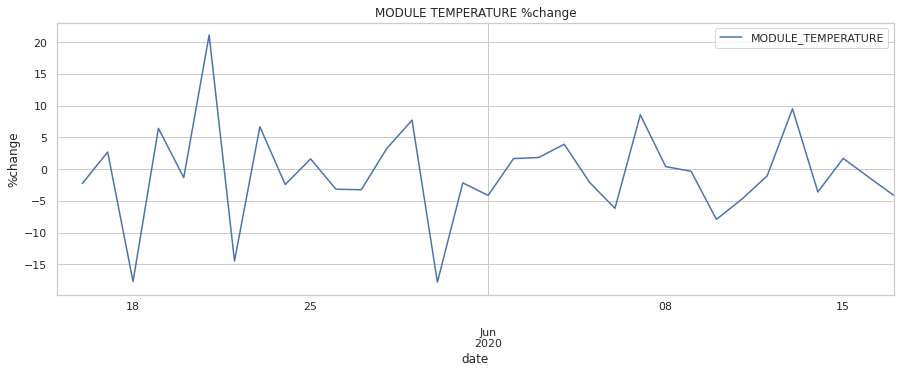

In [56]:
chan_mod_temp.plot(grid=True, legend=True, figsize=(15,5))
plt.ylabel('%change')
plt.title('MODULE TEMPERATURE %change')

### Irradiation

Text(0.5, 1.0, 'IRRADIATION')

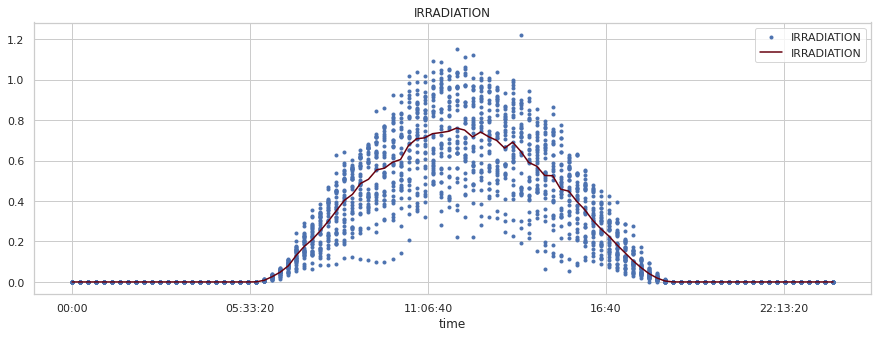

In [57]:
plant1_sensor.plot(x='time', y = 'IRRADIATION', style='.', legend=True, figsize=(15,5))
plant1_sensor.groupby('time')['IRRADIATION'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('IRRADIATION')

In [58]:
irra = plant1_sensor.pivot_table(values='IRRADIATION', index='time', columns='date')

In [59]:
irra.tail()

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  \
time                                                                   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         NaN         0.0         0.0         0.0         0.0   
23:30:00         NaN         0.0         0.0         0.0         0.0   
23:45:00         NaN         0.0         0.0         0.0         0.0   

date      2020-05-20  2020-05-21  2020-05-22  2020-05-23  2020-05-24  ...  \
time                                                                  ...   
22:45:00         0.0         0.0         0.0         0.0         0.0  ...   
23:00:00         0.0         0.0         0.0         0.0         0.0  ...   
23:15:00         0.0         0.0         0.0         0.0         0.0  ...   
23:30:00         0.0         0.0         0.0         0.0         0.0  ...   
23:45:00         0.0         0.0         0.0         0.0         0.0  ...   

date      2020-06-08  2020-06-09  2020-06-10  2020-06-11  2020-06-12  \
time                                                                   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         0.0         0.0         0.0         0.0         0.0   
23:30:00         0.0         0.0         0.0         0.0         0.0   
23:45:00         0.0         0.0         0.0         0.0         0.0   

date      2020-06-13  2020-06-14  2020-06-15  2020-06-16  2020-06-17  
time                                                                  
22:45:00         0.0         0.0         0.0         0.0         0.0  
23:00:00         0.0         0.0         0.0         0.0         0.0  
23:15:00         0.0         0.0         0.0         0.0         0.0  
23:30:00         0.0         0.0         0.0         0.0         0.0  
23:45:00         0.0         0.0         0.0         0.0         0.0  

[5 rows x 34 columns]

Text(0.5, 1.0, 'IRRADIATION BOXES')

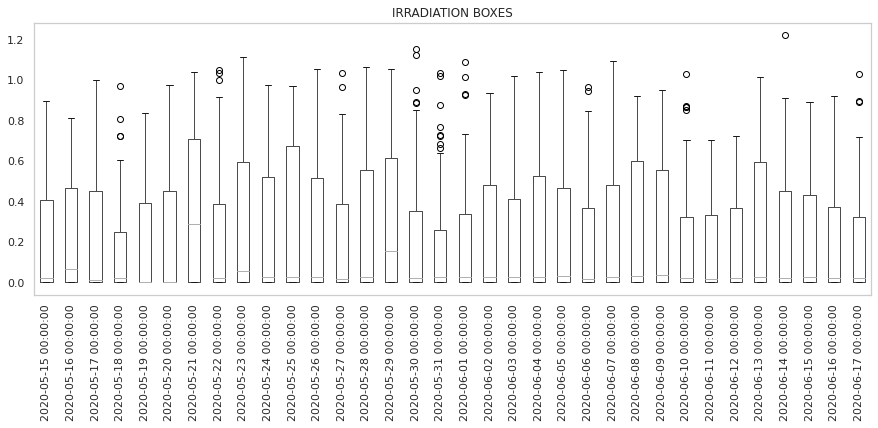

In [60]:
irra.boxplot(figsize=(15,5), rot = 90, grid=False)
plt.title('IRRADIATION BOXES')

In [61]:
rad = plant1_sensor.groupby('date')['IRRADIATION'].agg('sum')

Text(0.5, 1.0, 'IRRADIATION 15 MAY- 17 JUNE')

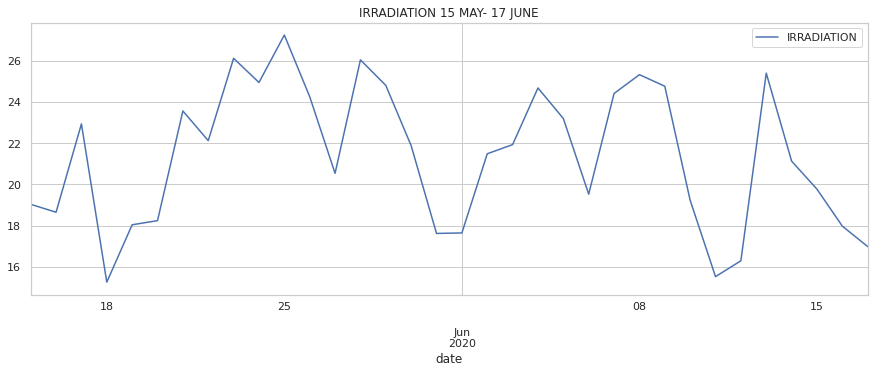

In [62]:
rad.plot(grid=True, figsize=(15,5), legend=True)
plt.title('IRRADIATION 15 MAY- 17 JUNE')

**Thursday 21 May 2020 is a date where plant are:**

1. more produce dc power.

2. ambient temperature, module temperature are maximun.



# Correlation

In this part, we are making correlation between feature to see how some feature can explain another feature. or see relation between them.

In [63]:
# we are merge our solar power generation data and weather sensor data
power_sensor = plant1_sensor.merge(plant1_data, left_on='DATE_TIME', right_on='DATE_TIME')

In [64]:
power_sensor.tail(3)

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION     date_x    time_x  DC_POWER  AC_POWER    DAILY_YIELD  \
2099          0.0 2020-06-17  23:15:00       0.0       0.0  129571.000000   
2100          0.0 2020-06-17  23:30:00       0.0       0.0  129571.000000   
2101          0.0 2020-06-17  23:45:00       0.0       0.0  127962.767857   

      TOTAL_YIELD    time_y     date_y  
2099  156142755.0  23:15:00 2020-06-17  
2100  156142755.0  23:30:00 2020-06-17  
2101  156142755.0  23:45:00 2020-06-17

In [65]:
#we remove the columns that we do not need
del power_sensor['date_x']
del power_sensor['date_y']
del power_sensor['time_x']
del power_sensor['time_y']

In [66]:
power_sensor.tail(3)

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  
2099          0.0       0.0       0.0  129571.000000  156142755.0  
2100          0.0       0.0       0.0  129571.000000  156142755.0  
2101          0.0       0.0       0.0  127962.767857  156142755.0

In [67]:
power_sensor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 2101
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            2102 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  2102 non-null   float64       
 2   MODULE_TEMPERATURE   2102 non-null   float64       
 3   IRRADIATION          2102 non-null   float64       
 4   DC_POWER             2102 non-null   float64       
 5   AC_POWER             2102 non-null   float64       
 6   DAILY_YIELD          2102 non-null   float64       
 7   TOTAL_YIELD          2102 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 147.8 KB


In [68]:
#we start correlation
power_sensor.corr(method = 'spearman')

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
AMBIENT_TEMPERATURE             1.000000            0.904966     0.727792   
MODULE_TEMPERATURE              0.904966            1.000000     0.898463   
IRRADIATION                     0.727792            0.898463     1.000000   
DC_POWER                        0.726844            0.899742     0.991862   
AC_POWER                        0.726807            0.899723     0.991859   
DAILY_YIELD                     0.561756            0.395577     0.214140   
TOTAL_YIELD                    -0.145263           -0.037379     0.019198   

                     DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  
AMBIENT_TEMPERATURE  0.726844  0.726807     0.561756    -0.145263  
MODULE_TEMPERATURE   0.899742  0.899723     0.395577    -0.037379  
IRRADIATION          0.991862  0.991859     0.214140     0.019198  
DC_POWER             1.000000  1.000000     0.215899     0.028539  
AC_POWER             1.000000  1.000000     0.215875     0.028532  
DAILY_YIELD          0.215899  0.215875     1.000000     0.041595  
TOTAL_YIELD          0.028539  0.028532     0.041595     1.000000

**Comment**

``DAILY_YIELD`` is not correlated with all feature but  ``AMBIENT_TEMPERATURE`` is moreless correlated.

``TOTAL_YIELD`` is also not correlated with all feature. I remove it in the correlation matrix. 

In [69]:
corr = power_sensor.drop(columns=['DAILY_YIELD', 'TOTAL_YIELD']).corr(method = 'spearman')

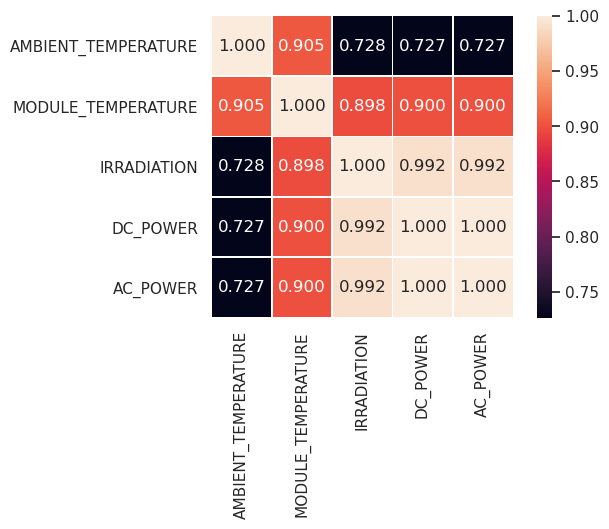

In [70]:
plt.figure(dpi=100)
sns.heatmap(corr, robust=True, annot=True, fmt='0.3f', linewidths=.5, square=True)
plt.show()

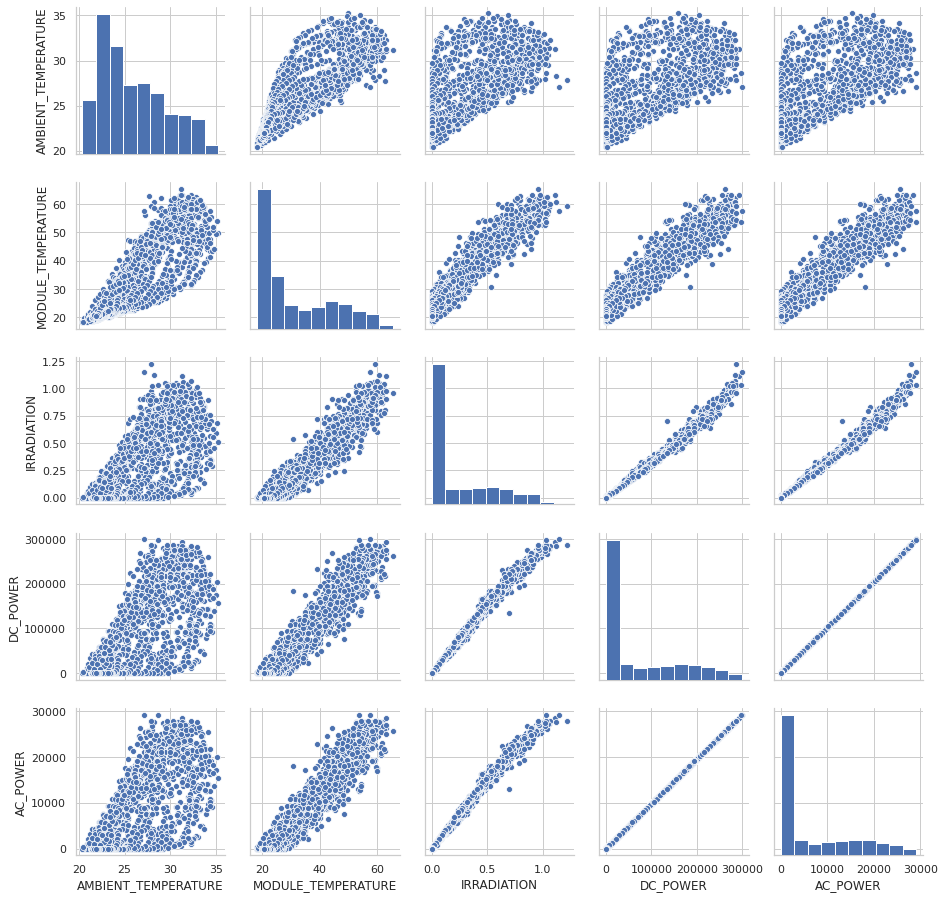

In [71]:
# we make pairplot
sns.pairplot(power_sensor.drop(columns=['DAILY_YIELD', 'TOTAL_YIELD']))
plt.show()

In [72]:
#we plot dc power vs ac power

<Figure size 600x400 with 0 Axes>

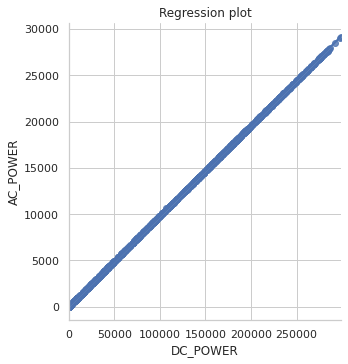

In [73]:
plt.figure(dpi=100)
sns.lmplot(x='DC_POWER', y='AC_POWER', data=power_sensor)
plt.title('Regression plot')
plt.show()



This graph said that inverter convert dc power to ac power linearly. $dc power = 10*ac power$ inverter lost 90% of their power when it convert. 

<Figure size 600x400 with 0 Axes>

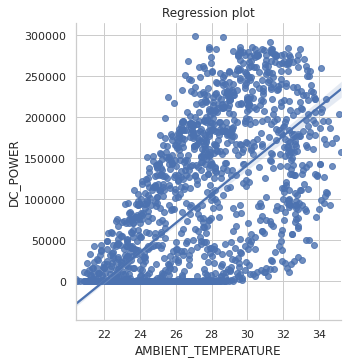

In [74]:
plt.figure(dpi=100)
sns.lmplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', data=power_sensor)
plt.title('Regression plot')
plt.show()

**Observation**

DC_power increases non linearly with an Ambient_Temperature.

<Figure size 600x400 with 0 Axes>

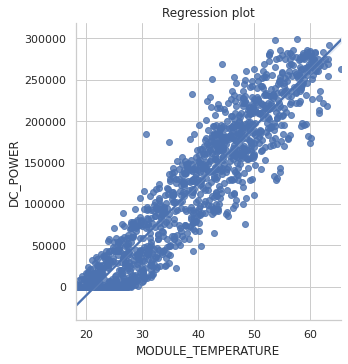

In [75]:
plt.figure(dpi=100)
sns.lmplot(x='MODULE_TEMPERATURE', y='DC_POWER', data=power_sensor)
plt.title('Regression plot')
plt.show()



``DC_POWER`` is produced linearly by ``MODULE_TEMPERATURE`` with some variability. 

<Figure size 600x400 with 0 Axes>

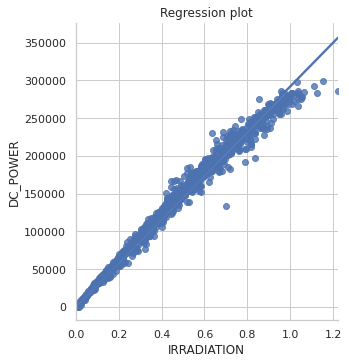

In [76]:
plt.figure(dpi=100)
sns.lmplot(x='IRRADIATION', y='DC_POWER', data=power_sensor)
plt.title('Regression plot')
plt.show()

**Observation**

DC_Power increase with IRRADIATION.

What happens if I introuduce a difference Temperature between ``AMBIENT_TEMPERATURE`` AND ``MODULE_TEMPERATURE``.

In [77]:
# we introduce DELTA_TEMPERATURE
power_sensor['DELTA_TEMPERATURE'] = abs(power_sensor.AMBIENT_TEMPERATURE - power_sensor.MODULE_TEMPERATURE)

In [78]:
# we check if all is ok
power_sensor.tail(3)

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  \
2099          0.0       0.0       0.0  129571.000000  156142755.0   
2100          0.0       0.0       0.0  129571.000000  156142755.0   
2101          0.0       0.0       0.0  127962.767857  156142755.0   

      DELTA_TEMPERATURE  
2099           1.299063  
2100           1.234532  
2101           1.481315

In [79]:
#now we use correlation
power_sensor.corr(method='spearman')['DELTA_TEMPERATURE']

AMBIENT_TEMPERATURE    0.661651
MODULE_TEMPERATURE     0.750403
IRRADIATION            0.795925
DC_POWER               0.804256
AC_POWER               0.804242
DAILY_YIELD            0.175267
TOTAL_YIELD           -0.044634
DELTA_TEMPERATURE      1.000000
Name: DELTA_TEMPERATURE, dtype: float64

**comment**

we remark that YIELD does not depend on ``DELTA_TEMPERATURE`` also.

Text(0.5, 1.0, 'correlation between DC_POWER and DELTA_TEMPERATURE')

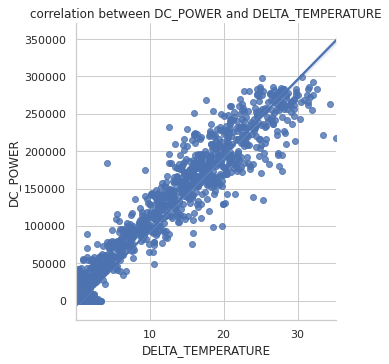

In [80]:
sns.lmplot(x='DELTA_TEMPERATURE', y='DC_POWER', data=power_sensor)
plt.title('correlation between DC_POWER and DELTA_TEMPERATURE')

**comment**

We know that $\dot Q \propto \Delta T$.So, we could say that ``DC_POWER`` is influenced by heat transfer.

Text(0.5, 1.0, 'Regression plot')

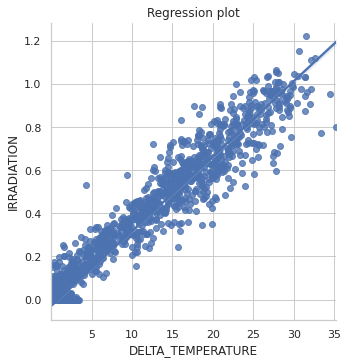

In [81]:
sns.lmplot(x='DELTA_TEMPERATURE', y='IRRADIATION', data=power_sensor)
plt.title('Regression plot')

**comment**

``IRRADIATION`` of Module and Heat Transfert between ambient air and Module are very well correlated.

# **Overall Summary**

In this notebook, the following key observations emerge::

1. Yield does not depend on the Temperature, the dc/ac power and irradiation.

2. the transfert function between dc and ac power is linear.

3. dc power is indeed influenced by the ambient temperature, by the temperature of the module, by the irradiation and finally by the heat transfer between the module and the air.

4. all 22 Inverters of Plant I lost 90% of their dc power when it convert.

END.
